In [73]:
# preparation ...
import pandas as pd
from tqdm import tqdm
import itertools
from collections import Counter

# we can not find 'PanGU-Σ', 'Luminous' in close Source index, cannot find 'Galatica', 'YaLM', 'PanGu-α' in open source list , so delete them.
openSourceList = ['T5', 'mT5', 'CPM-2','T0','GPT-NeoX-20B','CodeGen','Tk-Instruct','UL2','OPT','NLLB','BLOOM','GLM','Flan-T5','mT0','BLOOMZ','OPT-IML','Pythia','LLaMA','Llama','Vicuna','ChatGLM','CodeGeeX','Koala','GPT-2','GPT2','GPT 2']
closeSourceList = ['GShard','GPT-3','GPT 3', 'GPT3','LaMDA','HyperCLOVA','Codex','ERNIE 3','Jurassic-1','FLAN','MT-NLG','Yuan 1.0','Anthropic','WebGPT','Gopher','ERNIE 3.0 Titan','GLaM','InstructGPT','ChatGPT','AlphaCode','Chinchilla','PaLM','Cohere','AlexaTM','Sparrow','WeLM','U-PaLM','Flan-PaLM','Flan-U-PaLM','Alpaca','GPT-4' ,'GPT 4', 'GPT4','Claude']

readfile = "/data/jx4237data/DataForChatGPTinnovationWaves/"
df = pd.read_csv(readfile + 'LLMs1007.csv',dtype=object)
# some paper we need to delete:
# “fake” palm paper 1909.02134
# fake openai 1506.04006
delete_list = ['1506.04006','1909.02134']
df = df[~df['id'].isin(delete_list)]
# model2paper
model2paper = {}
for model in tqdm(openSourceList+closeSourceList):
    if model in model2paper:
        print('error')
    model2paper[model] = set()
    for paper in df[df['abstract'].str.contains("\\b%s\\b"%model) | df['abstract'].str.lower().str.contains("\\b%s\\b"%model.lower())  | df['title'].str.contains("\\b%s\\b"%model) | df['title'].str.lower().str.contains("\\b%s\\b"%model.lower())]['id']  :
        model2paper[model].add(paper)

for i in model2paper['GPT 4']:
    model2paper['GPT-4'].add(i)
for i in model2paper['GPT4']:
    model2paper['GPT-4'].add(i)
for i in model2paper['GPT 3']:
    model2paper['GPT-3'].add(i)
for i in model2paper['GPT3']:
    model2paper['GPT-3'].add(i)
for i in model2paper['GPT2']:
    model2paper['GPT-2'].add(i)
for i in model2paper['GPT 2']:
    model2paper['GPT-2'].add(i)
for i in model2paper['Llama']:
    model2paper['LLaMA'].add(i)
del model2paper['GPT 4']
del model2paper['GPT4']
del model2paper['GPT3']
del model2paper['GPT 3']
del model2paper['GPT2']
del model2paper['GPT 2']
del model2paper['Llama']

# paper2model
paper2model = {}
for model, paperSet in model2paper.items():
    for paper in paperSet:
        if paper not in paper2model:
            paper2model[paper] =[model]
        else:
            paper2model[paper].append(model)

openPaperSet = set()
closePaperSet = set()
for k,v in model2paper.items():
    if k in closeSourceList:
        for paper in v:
            closePaperSet.add(paper)
    if k in openSourceList:
        for paper in v:
            openPaperSet.add(paper)
pureOpen = openPaperSet - closePaperSet
pureClose = closePaperSet - openPaperSet
mixed = openPaperSet & closePaperSet
all = openPaperSet | closePaperSet

100%|██████████| 60/60 [00:22<00:00,  2.64it/s]


In [74]:
import json
import ast

In [75]:
# total version number: 'versions'
# total author number: 'authors_parsed'
# total category number: 'categories'
# open source model number
# closed source model number

In [76]:
def versionsNumber(row):
    return len(json.loads(row['versions'].replace("'", "\"")))
def authorNumber(row):
    return len(ast.literal_eval(row['authors_parsed']))
def categoryNumber(row):
    return len(row['categories'].split())
def modelNumber(row):
    if row['id'] not in paper2model:
        return 0
    else:
        return len(paper2model[row['id']])

def OpenModelNumber(row):
    OpenCount = 0
    if row['id'] not in paper2model:
        return 0
    else:
        for i in paper2model[row['id']]:
            if i in openSourceList:
                OpenCount += 1
    return OpenCount

def CloseModelNumber(row):
    CloseCount = 0
    if row['id'] not in paper2model:
        return 0
    else:
        for i in paper2model[row['id']]:
            if i in closeSourceList:
                CloseCount += 1
    return CloseCount


In [77]:
df['categories'][100].split()

['cs.CL']

In [78]:
df['versionsNumber'] = df.apply(versionsNumber, axis=1)

In [79]:
df['authorNumber'] = df.apply(authorNumber, axis=1)

In [80]:
df['categoryNumber'] = df.apply(categoryNumber, axis=1)

In [81]:
df['modelNumber'] = df.apply(modelNumber, axis=1)

In [82]:
df['OpenModelNumber'] = df.apply(OpenModelNumber, axis=1)
df['CloseModelNumber'] = df.apply(CloseModelNumber, axis=1)

In [83]:
df['publish_date_v1'] =pd.to_datetime(df['publish_date_v1'])

In [84]:
condition = (df['publish_date_v1'] > pd.to_datetime('2019-02-01')) & (df['publish_date_v1'] < pd.to_datetime('2023-10-01'))
selected_rows = df[condition]

In [85]:
selected_rows

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,...,authors_parsed,ContainChatGPT,ContainGPT,publish_date_v1,versionsNumber,authorNumber,categoryNumber,modelNumber,OpenModelNumber,CloseModelNumber
24,1902.08691,Yuqi Si,"Yuqi Si, Jingqi Wang, Hua Xu, Kirk Roberts",Enhancing Clinical Concept Extraction with Con...,Journal of the American Medical Informatics As...,NaN,10.1093/jamia/ocz096,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[['Si', 'Yuqi', ''], ['Wang', 'Jingqi', ''], [...",0,0,2019-02-22,4,4,1,0,0,0
25,1902.09097,Joe Booth,"Joe Booth, Jackson Booth",Marathon Environments: Multi-Agent Continuous ...,AAAI-2019 Workshop on Games and Simulations fo...,AAAI-2019 Workshop on Games and Simulations fo...,NaN,NaN,cs.AI cs.LG cs.MA,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[['Booth', 'Joe', ''], ['Booth', 'Jackson', '']]",0,0,2019-02-25,1,2,3,0,0,0
26,1903.01669,Vijaya Sai Krishna Gottipati,"Sai Krishna, Keehong Seo, Dhaivat Bhatt, Vince...",Deep Active Localization,10 pages,NaN,NaN,NaN,cs.RO cs.AI cs.LG stat.ML,http://creativecommons.org/publicdomain/zero/1.0/,...,"[['Krishna', 'Sai', ''], ['Seo', 'Keehong', ''...",0,0,2019-03-05,1,6,4,0,0,0
27,1903.02090,Florian Richter,"Florian Richter, Ryan K. Orosco, Michael C. Yip",Open-Sourced Reinforcement Learning Environmen...,"7 pages, 7 Figures",NaN,NaN,NaN,cs.RO,http://creativecommons.org/licenses/by/4.0/,...,"[['Richter', 'Florian', ''], ['Orosco', 'Ryan ...",0,0,2019-03-05,2,3,1,0,0,0
28,1903.08855,Nelson F. Liu,Nelson F. Liu and Matt Gardner and Yonatan Bel...,Linguistic Knowledge and Transferability of Co...,"22 pages, 4 figures; to appear at NAACL 2019",NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[['Liu', 'Nelson F.', ''], ['Gardner', 'Matt',...",0,0,2019-03-21,5,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6761,2310.01436,Yang Gao,"Haishuai Wang, Yang Gao, Xin Zheng, Peng Zhang...",Graph Neural Architecture Search with GPT-4,NaN,NaN,NaN,NaN,cs.LG cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[['Wang', 'Haishuai', ''], ['Gao', 'Yang', '']...",0,1,2023-09-30,1,6,2,1,0,1
6762,2310.01441,Hejia Geng,"Hejia Geng, Boxun Xu, Peng Li",UPAR: A Kantian-Inspired Prompting Framework f...,NaN,NaN,NaN,NaN,cs.CL cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[['Geng', 'Hejia', ''], ['Xu', 'Boxun', ''], [...",0,1,2023-09-30,1,3,2,1,0,1
6821,2310.02277,Lu Yin,"Lu Yin, Shiwei Liu, Ajay Jaiswal, Souvik Kundu...",Junk DNA Hypothesis: A Task-Centric Angle of L...,NaN,NaN,NaN,NaN,cs.LG cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[['Yin', 'Lu', ''], ['Liu', 'Shiwei', ''], ['J...",0,0,2023-09-29,1,5,2,0,0,0
6866,2310.03030,Suryanarayanan Balaji,Suryanarayanan Balaji and Rishikesh Magar and ...,GPT-MolBERTa: GPT Molecular Features Language ...,"Paper has 17 pages, 4 figures and 4 tables, al...",NaN,NaN,NaN,physics.chem-ph cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[['Balaji', 'Suryanarayanan', ''], ['Magar', '...",1,1,2023-09-20,1,4,2,1,0,1


In [120]:
selected_rows.to_csv(readfile+'LLM09enhanced.csv', index=False)

In [91]:
df['date'] = df['publish_date_v1']

In [88]:
df = selected_rows

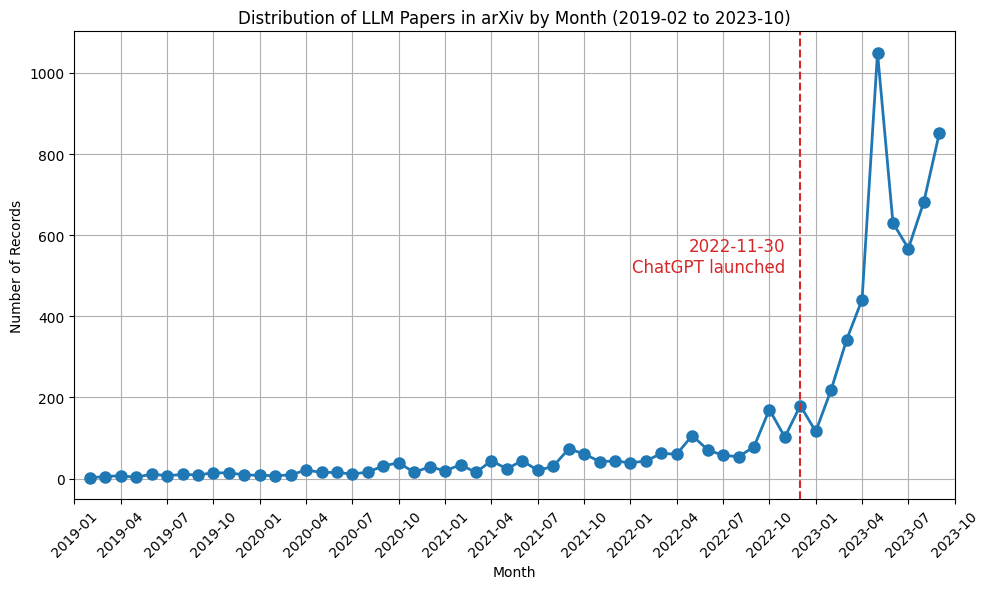

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
# Group the data by month and count the number of records in each month
monthly_counts = df.groupby(df['date'].dt.strftime('%Y-%m'))['date'].count()
monthly_counts.index = pd.to_datetime(monthly_counts.index)

start_date = pd.to_datetime('2019-02-01')
end_date = pd.to_datetime('2024-10-01')

plt.figure(figsize=(10, 6), dpi=100)
monthly_counts.plot(
    kind='line',
    marker='o',
    color='tab:blue',
    linestyle='-',
    linewidth=2,  # Customize line width
    markersize=8,  # Customize marker size
)


plt.axvline(pd.to_datetime('2022-12-01'), color='tab:red', linestyle='--')
plt.annotate('2022-11-30\nChatGPT launched', xy=('2022-11-01', 500), color='tab:red', fontsize=12, ha='right', va='bottom')


years = pd.date_range(start=start_date, end=end_date, freq='Y')
months = [1, 4, 7, 10]

tick_positions = []
tick_labels = []
for year in years:
    for month in months:
        tick_positions.append(year.replace(month=month, day=1))
        tick_labels.append(year.strftime('%Y') + '-' + str(month).zfill(2))

plt.xticks(tick_positions, tick_labels, rotation=45)
plt.grid(True)

plt.title('Distribution of LLM Papers in arXiv by Month (2019-02 to 2023-10)')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

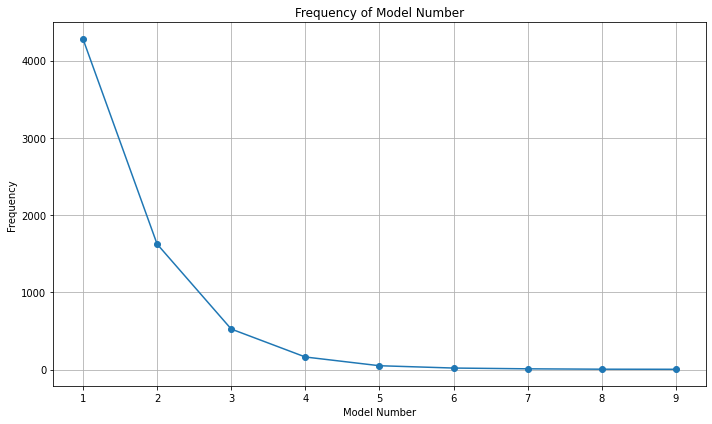

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df[df['versionsNumber'] < 10]

team_size_counts = filtered_df['versionsNumber'].value_counts().sort_index()

# Create a line plot of the frequency
plt.figure(figsize=(10, 6))
plt.plot(team_size_counts.index, team_size_counts.values, marker='o', color='tab:blue', linestyle='-')

plt.title('Frequency of Model Number')
plt.xlabel('Model Number')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

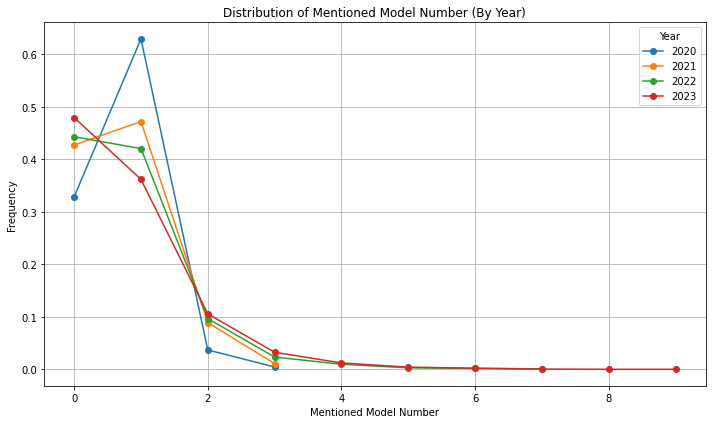

In [160]:
# Extract years from the 'date' column
df['year'] = df['date'].dt.year
filtered_df = df[df['modelNumber'] < 10]
# Filter data for each year and calculate team size counts
team_size_counts = {}
years = [2020, 2021, 2022, 2023]

for year in years:
    year_data = filtered_df[filtered_df['year'] == year]
    team_size_counts[year] = year_data['modelNumber'].value_counts().sort_index()

# Create line plots for each year
plt.figure(figsize=(10, 6))
for year in years:
    plt.plot(
        team_size_counts[year].index,
        team_size_counts[year].values/sum(team_size_counts[year].values),
        marker='o',
        label=str(year)
    )

plt.title('Distribution of Mentioned Model Number (By Year)')
plt.xlabel('Mentioned Model Number')
plt.ylabel('Frequency')
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

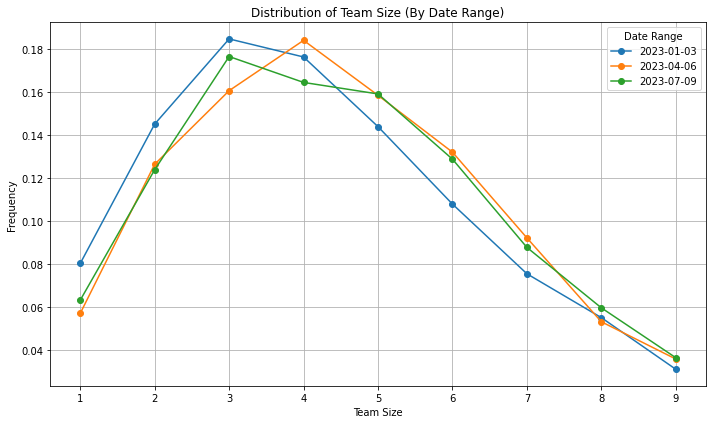

In [143]:
df['month'] = df['date'].dt.month
filtered_df = df[df['authorNumber'] < 10]

# Define the three date ranges
date_ranges = [(1, 3), (4, 6), (7, 9)]

# Create line plots for each date range
plt.figure(figsize=(10, 6))
for start_month, end_month in date_ranges:
    filtered_data = filtered_df[(filtered_df['month'] >= start_month) & (filtered_df['month'] <= end_month)]
    team_size_counts = filtered_data['authorNumber'].value_counts().sort_index()
    plt.plot(
        team_size_counts.index,
        team_size_counts.values/sum(team_size_counts.values),
        marker='o',
        label=f'2023-{start_month:02d}-{end_month:02d}'
    )

plt.title('Distribution of Team Size (By Date Range)')
plt.xlabel('Team Size')
plt.ylabel('Frequency')
plt.legend(title='Date Range', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()